In [2]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
#change directory
#%cd C:\Users\gadeu\Desktop\Datenanalyse mit Python\Data visualisation
csvfilename="housing.csv"
df=pd.read_csv(csvfilename,sep=",")
df.head()

C:\Users\gadeu\Desktop\Datenanalyse mit Python\Data visualisation


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [3]:
#check the dimensions of the dataset
df.shape

(20640, 10)

In [4]:
#check the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#check the datatypes
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [6]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [7]:
#duplicates checking
print(df.drop_duplicates())

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [8]:
#checking missing values
df.isnull().sum()
#df.isnull().sum().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
#before the treatment the dataframe has neen copied to df to avoid chenge in the original dat
df1 = df.copy()

In [10]:
#missing values treatment in the dataset
df1["total_bedrooms"] = df1["total_bedrooms"].fillna(df1["total_bedrooms"].mean())

In [11]:
#verify if the missing values have  been successfully threated
df1.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

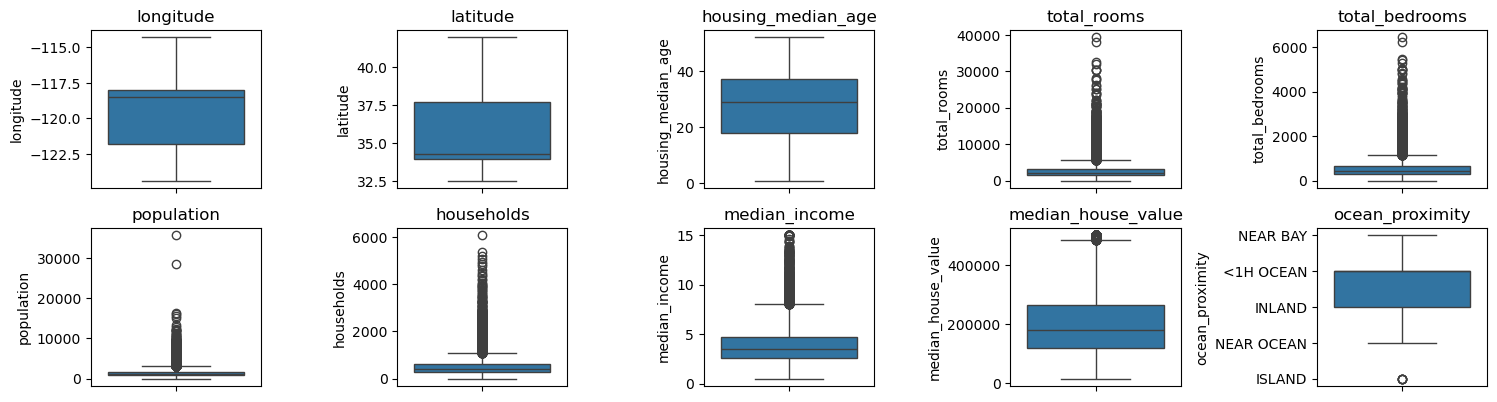

In [12]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(df1.columns):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(y=df1[col], data = df1)
    plt.title(col)

plt.tight_layout()
plt.show()

In [13]:
#column to analyse for outlier
column_to_analyse = "total_rooms"
#calculate Q1 and Q3
Q1 = df1[column_to_analyse].quantile(0.25)
Q2 = df1[column_to_analyse].quantile(0.5)
Q3 = df1[column_to_analyse].quantile(0.75)
# Calculation of the interquartile range
IQR = Q3 - Q1
#calculate the upper and lower bound for outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print(lower_bound, upper_bound)
#detect outliers
outliers=df1[(df1[column_to_analyse]<lower_bound)|(df1[column_to_analyse]>upper_bound)]
#print the number of outliers
print(outliers.shape[0])
#check the maximun value before the treatment
df1["total_rooms"].max()

-1102.625 5698.375
1287


39320.0

In [14]:
#winsorization as outliers treatment on the "total_rooms" column
column_to_analyse = "total_rooms"
df1["total_rooms"] = df1["total_rooms"].clip(lower=lower_bound, upper=upper_bound)


In [15]:
#check the maximun value after the treatment
df1["total_rooms"].max()

5698.375

In [16]:
#control of the number of outliers after treatment
outliers=df1[(df1["total_rooms"]<lower_bound)|(df1["total_rooms"]>upper_bound)]
print(outliers.shape[0])

0


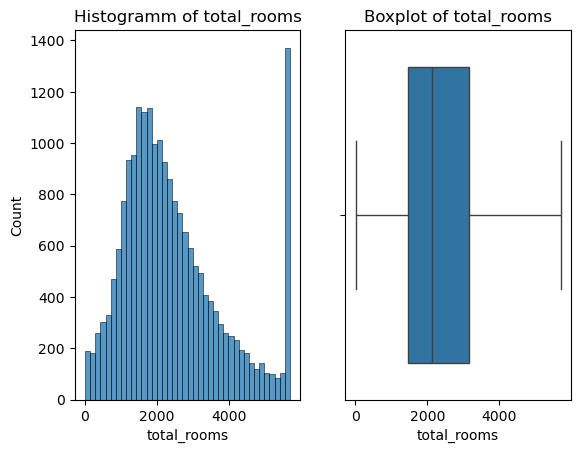

In [17]:
#visual inspection of the data after treatment of all the columns with outliers to see if the outliers have been removed
fig, axes = plt.subplots(1, 2)
sns.histplot(x = "total_rooms", data = df1, bins=40, ax=axes[0])
axes[0].set_title("Histogramm of total_rooms")
sns.boxplot(x = "total_rooms", data = df1, ax=axes[1])
axes[1].set_title("Boxplot of total_rooms")
plt.show()

In [18]:
#column to analyse for outlier
column_to_analyse = "total_bedrooms"
#calculate Q1 and Q3
Q1 = df1[column_to_analyse].quantile(0.25)
Q2 = df1[column_to_analyse].quantile(0.5)
Q3 = df1[column_to_analyse].quantile(0.75)
# Calculation of the interquartile range
IQR = Q3 - Q1
#calculate the upper and lower bound for outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR 
print(lower_bound, upper_bound)
#detect outliers
outliers=df1[(df1[column_to_analyse]<lower_bound)|(df1[column_to_analyse]>upper_bound)]
#print the number of outliers
print(outliers.shape[0])
#check the maximun value before the treatment
df1["total_rooms"].max()

-222.375 1162.625
1306


5698.375

In [19]:
#winsorization as outliers treatment on the "total_bedrooms" column
column_to_analyse = "total_bedrooms"
df1["total_bedrooms"] = df1["total_bedrooms"].clip(lower=lower_bound, upper=upper_bound)

In [20]:
#check the maximun value after the treatment
df1["total_bedrooms"].max()

1162.625

In [21]:
#control of the number of outliers after treatment
outliers=df1[(df1["total_bedrooms"]<lower_bound)|(df1["total_bedrooms"]>upper_bound)]
print(outliers.shape[0])

0


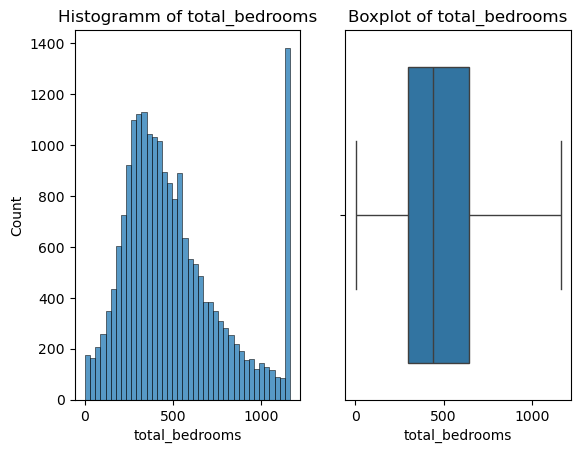

In [22]:
#visual inspection of the data after treatment of all the columns with outliers to see if the outliers have been removed
fig, axes = plt.subplots(1, 2)
sns.histplot(x = "total_bedrooms", data = df1, bins=40, ax=axes[0])
axes[0].set_title("Histogramm of total_bedrooms")
sns.boxplot(x = "total_bedrooms", data = df1, ax=axes[1])
axes[1].set_title("Boxplot of total_bedrooms")
plt.show()

In [23]:
#column to analyse for outlier
column_to_analyse = "population"
#calculate Q1 and Q3
Q1 = df1[column_to_analyse].quantile(0.25)
Q2 = df1[column_to_analyse].quantile(0.5)
Q3 = df1[column_to_analyse].quantile(0.75)
# Calculation of the interquartile range
IQR = Q3 - Q1
#calculate the upper and lower bound for outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR 
print(lower_bound, upper_bound)
#detect outliers
outliers=df1[(df1[column_to_analyse]<lower_bound)|(df1[column_to_analyse]>upper_bound)]
#print the number of outliers
print(outliers.shape[0])
#check the maximun value before the treatment
df1["population"].max()

-620.0 3132.0
1196


35682.0

In [24]:
#winsorization as outliers treatment on the "population" column
column_to_analyse = "population"
df1["population"] = df1["population"].clip(lower=lower_bound, upper=upper_bound)
#check the maximun value after the treatment
df1["population"].max()

3132.0

In [25]:
#control of the number of outliers after treatment
outliers=df1[(df1["population"]<lower_bound)|(df1["population"]>upper_bound)]
print(outliers.shape[0])

0


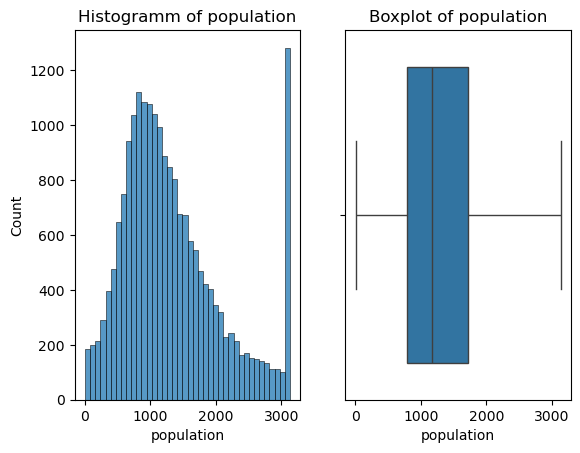

In [26]:
#visual inspection of the data after treatment of all the columns with outliers to see if the outliers have been removed
fig, axes = plt.subplots(1, 2)
sns.histplot(x = "population", data = df1, bins=40, ax=axes[0])
axes[0].set_title("Histogramm of population")
sns.boxplot(x = "population", data = df1, ax=axes[1])
axes[1].set_title("Boxplot of population")
plt.show()

In [27]:
#column to analyse for outlier
column_to_analyse = "households"
#calculate Q1 and Q3
Q1 = df[column_to_analyse].quantile(0.25)
Q2 = df[column_to_analyse].quantile(0.5)
Q3 = df[column_to_analyse].quantile(0.75)
# Calculation of the interquartile range
IQR = Q3 - Q1
#calculate the upper and lower bound for outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR 
print(lower_bound, upper_bound)
#detect outliers
outliers=df[(df[column_to_analyse]<lower_bound)|(df[column_to_analyse]>upper_bound)]
#print the number of outliers
print(outliers.shape[0])
#check the maximun value before the treatment
df1["population"].max()

-207.5 1092.5
1220


3132.0

In [28]:
#winsorization as outliers treatment on the "households" column
column_to_analyse = "households"
df1["households"] = df["households"].clip(lower=lower_bound, upper=upper_bound)
#check the maximun value after the treatment
df1["households"].max()

1092.5

In [29]:
#control of the number of outliers after treatment
outliers=df1[(df1["households"]<lower_bound)|(df1["households"]>upper_bound)]
print(outliers.shape[0])

0


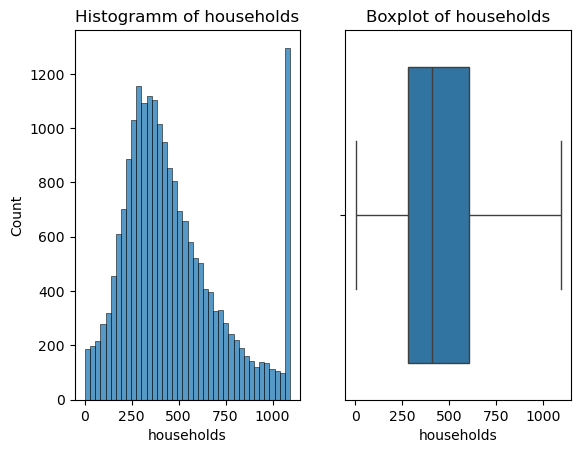

In [30]:
#visual inspection of the data after treatment of all the columns with outliers to see if the outliers have been removed
fig, axes = plt.subplots(1, 2)
sns.histplot(x = "households", data = df1, bins=40, ax=axes[0])
axes[0].set_title("Histogramm of households")
sns.boxplot(x = "households", data = df1, ax=axes[1])
axes[1].set_title("Boxplot of households")
plt.show()

In [31]:
#column to analyse for outlier
column_to_analyse = "median_income"
#calculate Q1 and Q3
Q1 = df[column_to_analyse].quantile(0.25)
Q2 = df[column_to_analyse].quantile(0.5)
Q3 = df[column_to_analyse].quantile(0.75)
# Calculation of the interquartile range
IQR = Q3 - Q1
#calculate the upper and lower bound for outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR 
print(lower_bound, upper_bound)
#detect outliers
outliers=df[(df[column_to_analyse]<lower_bound)|(df[column_to_analyse]>upper_bound)]
#print the number of outliers
print(outliers.shape[0])
#check the maximun value before the treatment
df["median_income"].max()

-0.7063750000000004 8.013024999999999
681


15.0001

In [32]:
#winsorization as outliers treatment on the "households" column
column_to_analyse = "median_income"
df1["median_income"] = df["median_income"].clip(lower=lower_bound, upper=upper_bound)
#check the maximun value after the treatment
df1["median_income"].max()

8.013024999999999

In [33]:
#control of the number of outliers after treatment
outliers=df1[(df1["median_income"]<lower_bound)|(df1["median_income"]>upper_bound)]
print(outliers.shape[0])

0


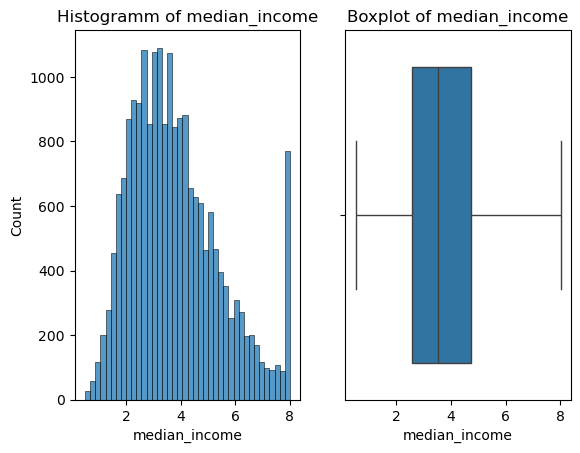

In [34]:
#visual inspection of the data after treatment of all the columns with outliers to see if the outliers have been removed
fig, axes = plt.subplots(1, 2)
sns.histplot(x = "median_income", data = df1, bins=40, ax=axes[0])
axes[0].set_title("Histogramm of median_income")
sns.boxplot(x = "median_income", data = df1, ax=axes[1])
axes[1].set_title("Boxplot of median_income")
plt.show()

In [35]:
#column to analyse for outlier
column_to_analyse = "median_house_value"
#calculate Q1 and Q3
Q1 = df[column_to_analyse].quantile(0.25)
Q2 = df[column_to_analyse].quantile(0.5)
Q3 = df[column_to_analyse].quantile(0.75)
# Calculation of the interquartile range
IQR = Q3 - Q1
#calculate the upper and lower bound for outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR 
print(lower_bound, upper_bound)
#detect outliers
outliers=df[(df[column_to_analyse]<lower_bound)|(df[column_to_analyse]>upper_bound)]
#print the number of outliers
print(outliers.shape[0])
#check the maximun value before the treatment
df["median_house_value"].max()

-98087.5 482412.5
1071


500001.0

In [36]:
#winsorization as outliers treatment on the "households" column
column_to_analyse = "median_house_value"
df1["median_house_value"] = df["median_house_value"].clip(lower=lower_bound, upper=upper_bound)
#check the maximun value after the treatment
df1["median_house_value"].max()

482412.5

In [37]:
#control of the number of outliers after treatment
outliers=df1[(df1["median_house_value"]<lower_bound)|(df1["median_house_value"]>upper_bound)]
print(outliers.shape[0])

0


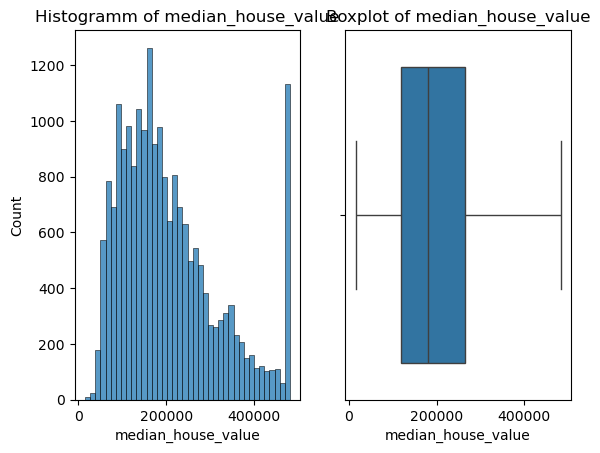

In [38]:
#visual inspection of the data after treatment of all the columns with outliers to see if the outliers have been removed
fig, axes = plt.subplots(1, 2)
sns.histplot(x = "median_house_value", data = df1, bins=40, ax=axes[0])
axes[0].set_title("Histogramm of median_house_value")
sns.boxplot(x = "median_house_value", data = df1, ax=axes[1])
axes[1].set_title("Boxplot of median_house_value")
plt.show()

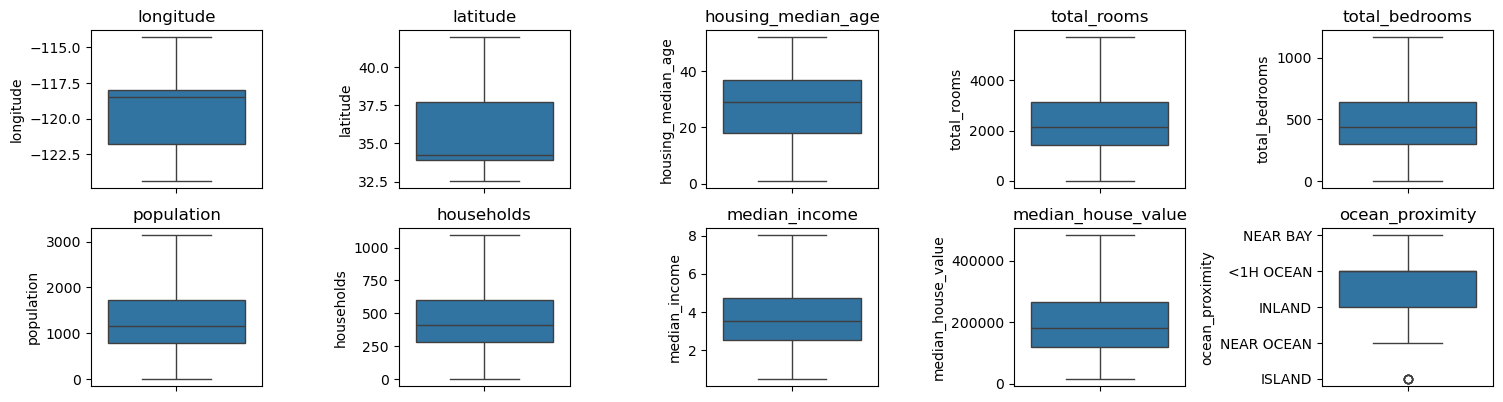

In [39]:
#visual inspection of the data after treatment of all the columns with outliers to see if the outliers have been removed
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 10))

for i, col in enumerate(df.columns):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(y=df1[col], data = df1)
    plt.title(col)

plt.tight_layout()
plt.show()


In [40]:
# save the df1 as a modified version of df
df1.to_csv("modified_df.csv", index=False)

In [49]:
df1.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2441.692472   
std        2.003532      2.135952           12.585558   1397.790038   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000   5698.375000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       502.213782   1336.959012    469.020107       3.801010   
std        284.078214    765.550830    265.507540       1.657658   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.000000    787.000000    280.000000       2.563400   
50%        438.000000   1166.000000    409.000000       3.534800   
75%        643.250000   1725.000000    605.000000       4.743250   
max       1162.625000   3132.000000   1092.500000       8.013025   

       median_house_value  
count        20640.000000  
mean        205981.224976  
std         113217.350152  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         482412.500000

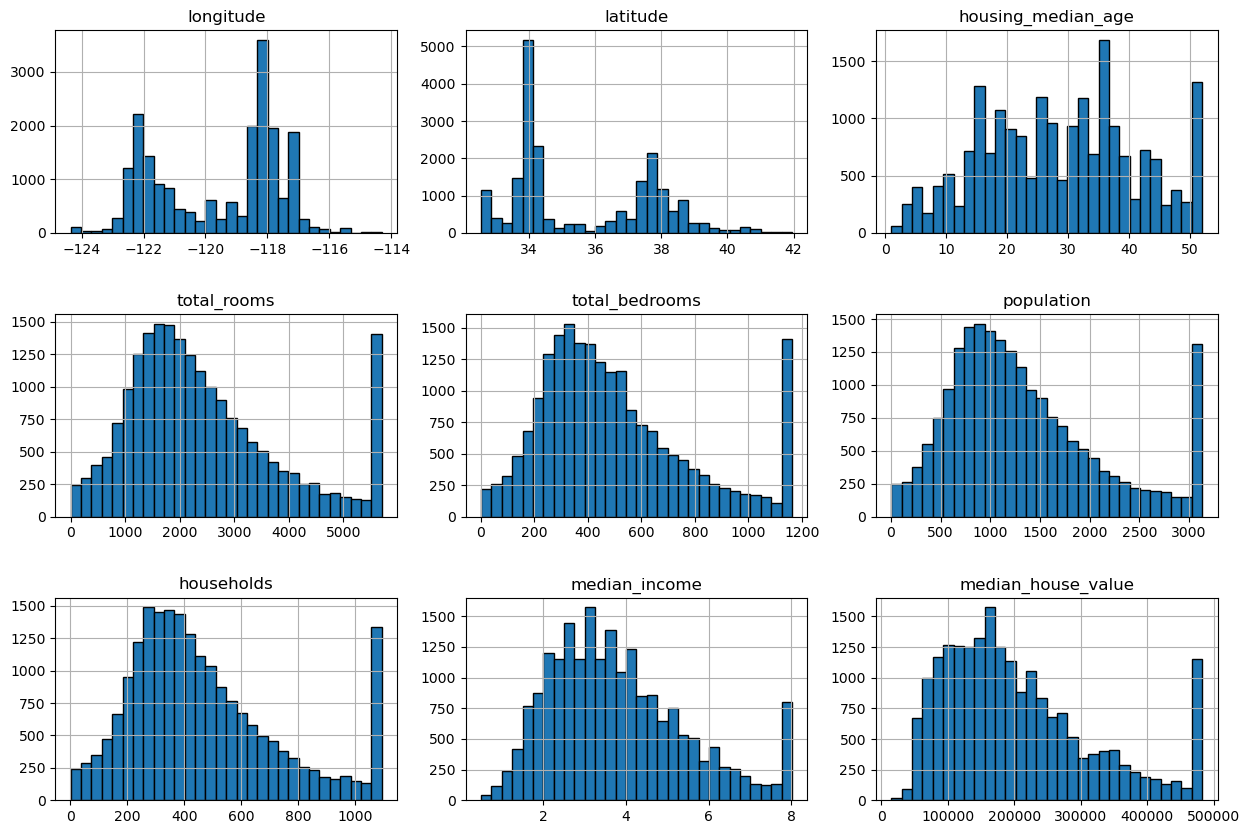

In [41]:
#Histogram plots for the analysis of distribution
df1.hist(figsize=(15, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.4, wspace=0.2)

In [42]:
#Calculation of the mean values of features grouped by proximity to the ocean
proximitygroups=df.groupby(by="ocean_proximity").mean(numeric_only=True)
proximitygroups

longitude   latitude  housing_median_age  total_rooms  \
ocean_proximity                                                           
<1H OCEAN       -118.847766  34.560577           29.279225  2628.343586   
INLAND          -119.732990  36.731829           24.271867  2717.742787   
ISLAND          -118.354000  33.358000           42.400000  1574.600000   
NEAR BAY        -122.260694  37.801057           37.730131  2493.589520   
NEAR OCEAN      -119.332555  34.738439           29.347254  2583.700903   

                 total_bedrooms   population  households  median_income  \
ocean_proximity                                                           
<1H OCEAN            546.539185  1520.290499  517.744965       4.230682   
INLAND               533.881619  1391.046252  477.447565       3.208996   
ISLAND               420.400000   668.000000  276.600000       2.744420   
NEAR BAY             514.182819  1230.317467  488.616157       4.172885   
NEAR OCEAN           538.615677  1354.008653  501.244545       4.005785   

                 median_house_value  
ocean_proximity                      
<1H OCEAN             240084.285464  
INLAND                124805.392001  
ISLAND                380440.000000  
NEAR BAY              259212.311790  
NEAR OCEAN            249433.977427

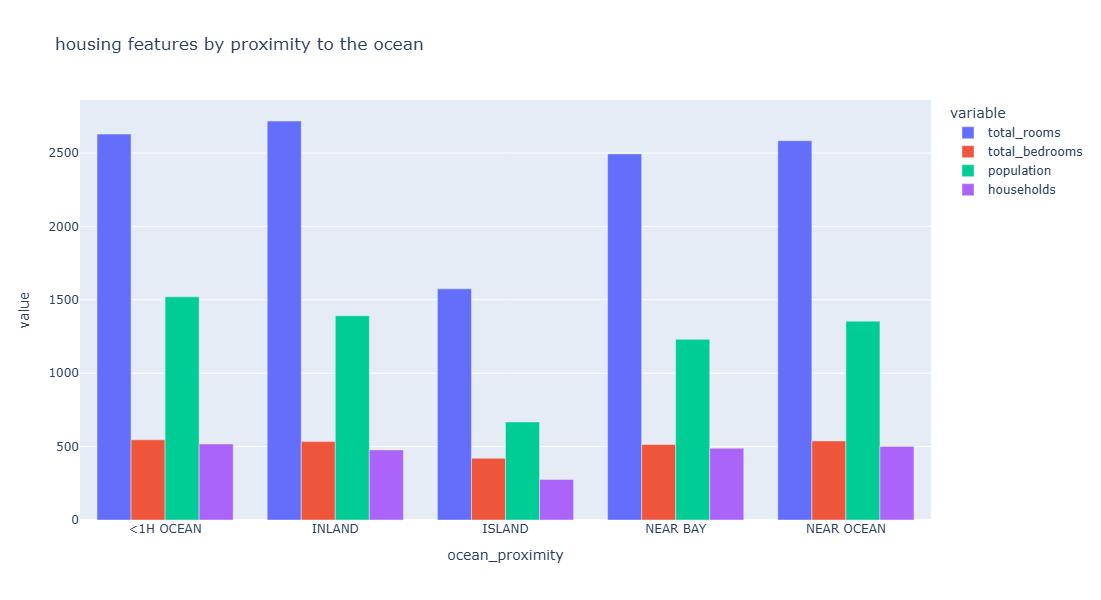

In [43]:
#bar chart for their representation
fig=px.bar(data_frame=proximitygroups,
       y=["total_rooms","total_bedrooms","population","households"],
       barmode="group",height=600,title="housing features by proximity to the ocean")
fig.show()

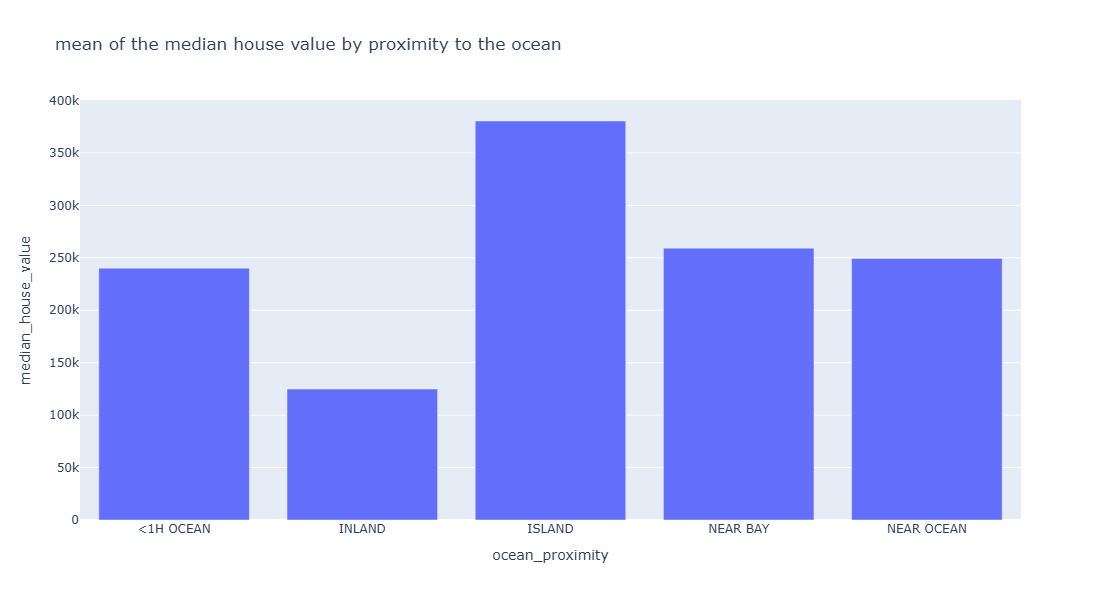

In [44]:
#bar chart of the median house value by pproximity to the ocean
fig=px.bar(data_frame=proximitygroups,
       y="median_house_value",
       barmode="group",height=600,title="mean of the median house value by proximity to the ocean")
fig.show()

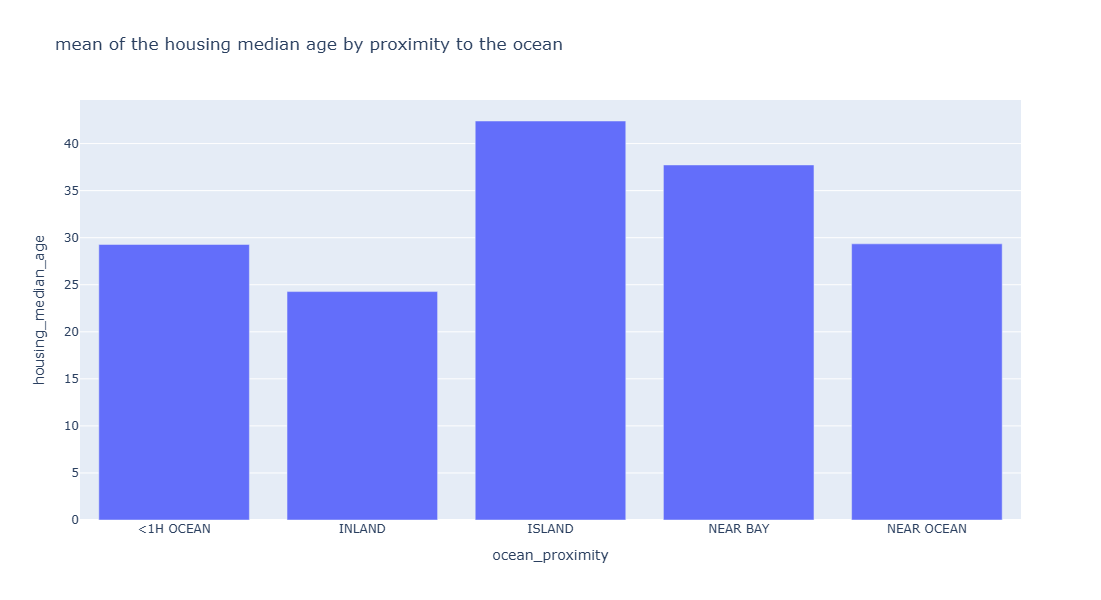

In [45]:
#bar chart of the housing median age by pproximity to the ocean
fig=px.bar(data_frame=proximitygroups,
       y="housing_median_age",
       barmode="group",height=600,title="mean of the housing median age by proximity to the ocean")
fig.show()

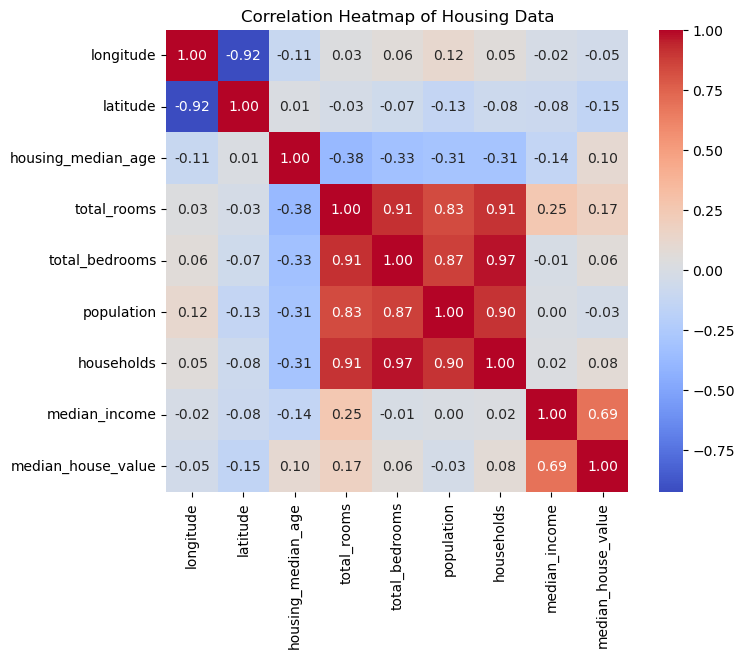

In [46]:
#heatmap for the analysis of correlations between features
selected_cols = df1[["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"]]

# Calculate the correlation matrix
corr_matrix = selected_cols.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Heatmap of Housing Data")
plt.show()

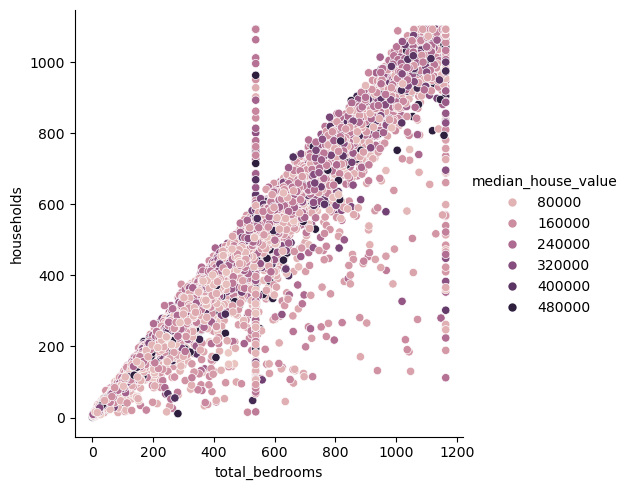

In [47]:
sns.relplot(data=df1, x="total_bedrooms", y="households", hue="median_house_value")
plt.show()

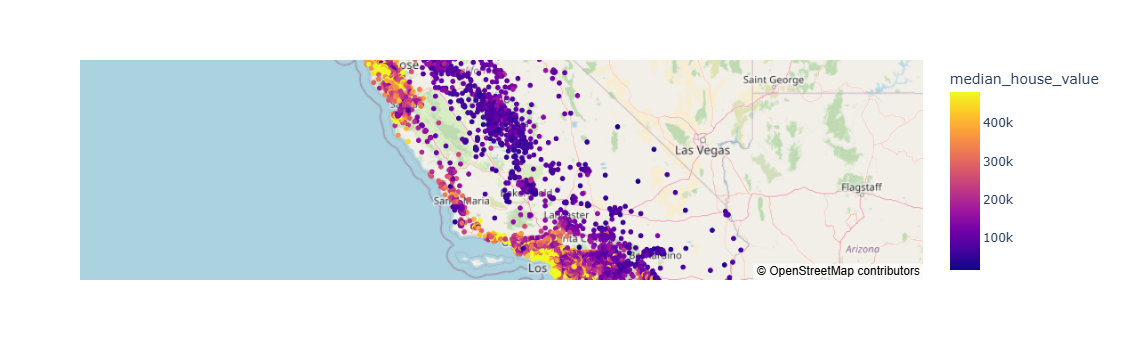

In [48]:
# mapping of the median house value with the location(latitude and longitude)
# Create a scatter mapbox plot
fig = px.scatter_mapbox(df1, lat="latitude", lon="longitude", color="median_house_value", size_max=10,
    zoom=5, mapbox_style="open-street-map")
fig.show()